In [81]:
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import Kddcup99 Dataset
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
#df = pd.read_csv('kddcup99.csv')

column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

df = pd.read_csv(url, header=None, names=column_names)
df2 = df.copy()

print(len(df))

494021


In [82]:
X = df.iloc[: , :41]
y = df.iloc[:, 41:]

print(y)

IC = np.unique(y)

df.head()

          label
0       normal.
1       normal.
2       normal.
3       normal.
4       normal.
...         ...
494016  normal.
494017  normal.
494018  normal.
494019  normal.
494020  normal.

[494021 rows x 1 columns]


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [86]:
vals, df2['label'] = np.unique(df['label'].values, return_inverse=True)

y = df2.iloc[:, 41:]

print(vals)
print(y)

print(y.shape)

['back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.' 'imap.'
 'ipsweep.' 'land.' 'loadmodule.' 'multihop.' 'neptune.' 'nmap.' 'normal.'
 'perl.' 'phf.' 'pod.' 'portsweep.' 'rootkit.' 'satan.' 'smurf.' 'spy.'
 'teardrop.' 'warezclient.' 'warezmaster.']
        label
0          11
1          11
2          11
3          11
4          11
...       ...
494016     11
494017     11
494018     11
494019     11
494020     11

[494021 rows x 1 columns]
(494021, 1)


In [87]:
vals1, X['protocol_type'] = np.unique(df['protocol_type'].values, return_inverse=True)
vals2, X['service'] = np.unique(df['service'].values, return_inverse=True)
vals3, X['flag'] = np.unique(df['flag'].values, return_inverse=True)


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [89]:
from sklearn.preprocessing import scale
# Scale the data
Xs = scale(X_train)

In [67]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

logReg.fit(X_train, y_train)

c:\Users\SGranaturov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
from sklearn.metrics import accuracy_score

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9765343508359985
Test score:  0.976428318404939


In [90]:
x_labels_w = X_train.columns[:]
Xw = np.array(X_train[x_labels_w].values)

print("Matrix dimensions of Xw is " + str(Xw.shape))

Matrix dimensions of Xw is (395216, 41)


c:\Users\SGranaturov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\SGranaturov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<StemContainer object of 3 artists>

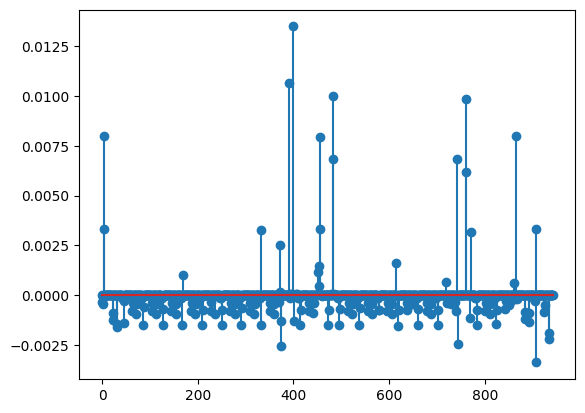

In [91]:
logReg_w = LogisticRegression(C = 1e10)
logReg_w.fit(Xw, y_train)

W = logReg_w.coef_
W = W.flatten()
plt.stem(W)

In [92]:
print(Xw.shape)
print(y_train.shape)

idx1 = np.argsort(np.abs(W))[-1]
idx2 = np.argsort(np.abs(W))[-2]
idx3 = np.argsort(np.abs(W))[-3]

heavy = [x_labels_w[idx1], x_labels_w[idx2], x_labels_w[idx3]]
print(heavy)

(395216, 41)
(395216, 1)


IndexError: index 400 is out of bounds for axis 0 with size 41